## 5.2. Fórmula Interpolatória de Lagrange

Seja $f(x)$ definida em $x_0, x_1,...,x_n$, (n+1) pontos distintos de um intervalo $[a,b]$ e $y_i=f(x_i)$, $i=0,1,...,n$. O polinômio interpolador de Lagrange é dado por 

$$ P(x) = y_0 l_0(x) + y_1 l_1(x) + ...+y_n l_n(x)$$

onde $l_k(x)$, $k=0,1,...,n$ são polinômios de grau $n$ obtidos pela fórmula 

$$ l_k(x)=\frac{(x-x_0)(x-x_1)...(x-x_{k-1})(x-x_{k+1})...(x-x_n)}{(x_k-x_0)(x_k-x_1)...(x_k-x_{k-1})(x_k-x_{k+1})...(x_k-x_n)}$$

ou, de forma compacta

$$P(x)=\sum_{k=0}^{n} y_k l_k(x) $$

com

$$ l_k(x) = \prod_{j=0 e j\neq k}^{n} \frac{(x-x_j)}{(x_k-x_j)}$$

### Exemplo 1

Considere a função $f(x)$ definida nos pontos $\{(0.0, 1.3), (0.5, 2.5), (1.0, 0.9)\}$. Determine o polinômio interpolador, usando a fórmula de Lagrange, e estime $f(0.8)$.

*Solução:* Queremos o polinômio na forma $ P(x) = y_0 l_0(x) + y_1 l_1(x) + y_2 l_2(x)$. Então, obtemos os $l_k(x)$ fazendo

$l_0 = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} = \frac{(x-0.5)(x-1.0)}{(0.0-0.5)(0.0-1.0)} = 
\frac{x^2-1.5x+0.5}{0.5}$

$l_1 = \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}=\frac{(x-0.0)(x-1.0)}{(0.5-0.0)(0.5-1.0)}=\frac{x^2-x}{-0.25}$

$l_2 = \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}=\frac{(x-0.0)(x-0.5)}{(1.0-0.0)(1.0-0.5)}=\frac{x^2-0.5x}{0.5}$

Assim,
$P(x)=1.3 \left(\frac{x^2-1.5x+0.5}{0.5} \right) + 2.5 \left(  \frac{x^2-x}{-0.25} \right) + 0.9 \left( \frac{x^2-0.5x}{0.5} \right) = -5.6x^2+5.2x+1.3$

Portanto, tem-se

$f(0.8) \simeq P(0.8) = -5.6(0.8)^2+5.2(0.8)+1.3 = 1.8760 $.

O script Python abaixo plota o gráfico do polinômio obtido juntamente com os pontos tabelados.

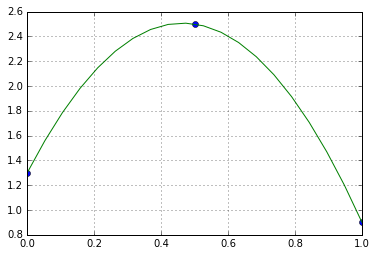

P(0.8)= 1.8759999999999997


In [28]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = [0.0, 0.5, 1.0]
y = [1.3, 2.5, 0.9]

def P(x): return  -5.6*x**2 + 5.2*x + 1.3

xnew = np.linspace(x[0], x[-1], num=20)
plt.plot(x, y, 'o', xnew, P(xnew),'-')
plt.grid()
plt.show()

print ('P(0.8)=', P(0.8))

### Exemplo 2

Considere a função $f(x)= \frac{(3+x)}{(1+x)}$ definida nos pontos
$\{(0.1, 2.8182), (0.2, 2.6667), (0.4, 2.4286)\}$. Determine o polinômio interpolador de $f(x)$, usando a fórmula de Lagrange, estime $f(0.25)$ e dê um limitante superior para o erro.

*Solução:* Queremos o polinômio na forma $ P(x) = y_0 l_0(x) + y_1 l_1(x) + y_2 l_2(x)$. Então, obtemos os $l_k(x)$ fazendo

$l_0 = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} = \frac{(x-0.2)(x-0.4)}{(0.1-0.2)(0.1-0.4)} = 
\frac{x^2-0.6x+0.08}{0.03}$

$l_1 = \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}=\frac{(x-0.1)(x-0.4)}{(0.2-0.1)(0.2-0.4)}=\frac{x^2-0.5x+0.04}{-0.02}$

$l_2 = \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}=\frac{(x-0.1)(x-0.2)}{(0.4-0.1)(0.4-0.2)}=\frac{x^2-0.3x+0.02}{0.06}$

Assim,
$P(x)=2.8182 \left(\frac{x^2-0.6x+0.08}{0.03} \right) + 2.6667 \left(  \frac{x^2-0.5x+0.04}{-0.02} \right) + 2.4286 \left( \frac{x^2-0.3x+0.02}{0.06} \right) = 1.0817x^2-1.8395x+2.9913$

Portanto, tem-se

$f(0.25) \simeq P(0.25) = 1.0817(0.25)^2-1.8395(0.25)+2.9913= 2.5990 $.


A seguir, um script Pyhton que implementa a fórmula de Lagrange para este exemplo

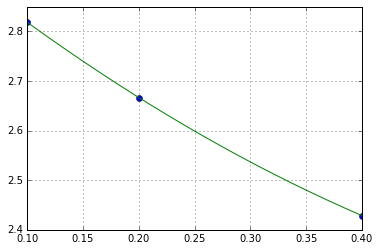

P( 0.25 ) = 2.5990125


In [29]:
% matplotlib inline
import matplotlib.pyplot as plt

X = [0.1, 0.2, 0.4]
Y = [2.8184, 2.6667, 2.4286]

n = len(Y)

def calculaP(x):
    valor = 0
    for k in range(n):
        lk = 1.0
        for i in range(n):
            if k != i:
                lk = lk*(x - X[i])/(X[k]-X[i])
        valor = valor + Y[k]*lk 
    return valor

Ynew = []
Xnew = np.linspace(X[0], X[-1], num=20)
for xnew in Xnew:
    ynew = calculaP(xnew)
    Ynew.append(ynew)

plt.plot(X, Y, 'o', Xnew, Ynew,'-')
plt.grid()
plt.show()

x = 0.25
print ("P(",x,") =", calculaP(x))

**Limitante Superior para o erro**

A partir da fórmula do limitante superior para o erro

$$ \left|E(x)\right| \leq  \frac{\left| \psi(x) \right|}{(n+1)!}M$$ com $$M = máx \{  \left|f^{(n+1)}(x)\right|, x \in [x_0, x_1] \} $$.

Para $n = 2$, temos:

$$ \left| E(x) \right| \leq \left| \frac{(x-x_0)(x-x_1)(x-x_2)}{3!}\right| M $$
com
$$M = máx. \{  \left|f^{(3)}(x)\right|, x \in [0.1, 0.4] \} $$

Como $f^{(3)}(x) = \frac{-12}{(1+x)^4}$ é uma função decrescente em módulo no intervalo [0.1, 0.4], temos que |f^{(3)}(x)\right| assume valor máximo em $x=0.1$, ou seja,

$$ M =  máx  \left\{  \left| \frac{-12}{(1+x)^4} \right|, x \in [0.1, 0.4] \right\} = \frac{-12}{(1+0.1)^4} = 8.1962 $$

Asim, o limitante superiorpara o erro ao aproximarmos f(0.25) por P(0.25) é dado por

$$ \left| E(0.25) \right| \leq \left| \frac{(0.25-0.1)(0.25-0.2)(0.25-0.4)}{6}\right| 8.1962 = 0.0015 $$

O script Python abaixo plota os gráficos de P(x) e de f(x) para comparação.

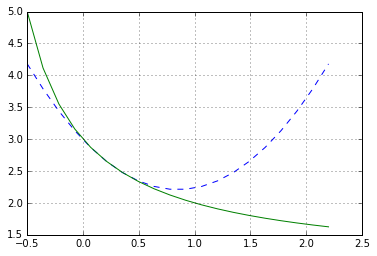

In [30]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

P = lambda x: 1.0817*x**2 - 1.8395*x + 2.9913
f = lambda x: (3+x)/(1+x)

x = np.linspace(-0.5, 2.2, num=20)
plt.plot(x, P(x), '--', x, f(x),'-')
plt.grid()
plt.show()

### Fórmula interpolatória de Lagrange para pontos equidistantes

Se os pontos $x_0, ..., x_n$ forem igualmente espaçados, ou seja, se $x_{i+1}-x_i=h$ para $i=0, ..., n-1$, então é possível fazer uma mudança de variável e obter uma fórmula simplificada para o polinômio interpolador de Lagrange.
Fazemos 

$$ u = \frac{x-x_0}{h} $$
que é o mesmo que
$$ x = x_o +uh$$

e reescrevemos a fórmula para $l_k(x)$ usando as propriedades 

a) $(x-x_r)=(u-r)h$

b) $(x_r-x_s) = (r-s)h$

para obter os polinômios $l_k$ em função da variável $u$.

Assim, a fórmula de Lagrange fica 

$$P(u)=\sum_{k=0}^{n} y_k l_k(u) $$

com

$$ l_k(u) = \prod_{j=0 e j\neq k}^{n} \frac{(u-j)}{(k-j)}$$

Para avaliar o valor do polinômio de um determinado valor de $x$ precisamos obter o valor correspondente na variável $u$, fazendo, $ u = \frac{x-x_0}{h} $ e calcular $P(u)$.

**Limitante superior para o erro**

O erro máximo, nesse caso, é dado pela fórmula

$$ E(x) \leq  \frac{\left| \psi(x) \right|}{(n+1)!}M$$ com $$M = máx \{  \left|f^{(n+1)}(x)\right|, x \in [x_0, x_1] \} $$.
